<a href="https://colab.research.google.com/github/naseemdabiran/CIS_9660/blob/main/Brain%20Tumor%20Detection%20in%20MRI%20Scan%20-%20Classification%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2: Brain Tumors Detection Using Supervised and Unsupervised Machine Learning Algorithms - Classification**

Naseem Dabiran 

In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from os import listdir
from os.path import isfile, join

from skimage.feature import local_binary_pattern
from skimage.io import imread, imshow
from skimage.transform import  resize
from skimage.color import rgb2gray
from skimage.filters import prewitt_h,prewitt_v

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.metrics import classification_report

In [ ]:
# Connect notebook to google drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [ ]:
#viewing all of the files within the folder
!ls '/content/drive/MyDrive/cis 9660 project 2/brain_mri'

'gg (100).jpg'	'gg (636).jpg'	'm2 (138).jpg'	 no177.jpg	'p (306).jpg'
 gg100.jpg	'gg (637).jpg'	'm2 (139).jpg'	 no178.jpg	'p (307).jpg'
'gg (101).jpg'	'gg (638).jpg'	'm2 (13).jpg'	 no179.jpg	'p (308).jpg'
'gg (102).jpg'	'gg (639).jpg'	'm2 (140).jpg'	'no 17.jpg'	'p (309).jpg'
'gg (103).jpg'	'gg (63).jpg'	'm2 (141).jpg'	 no17.jpg	'p (30).jpg'
'gg (104).jpg'	 gg63.jpg	'm2 (142).jpg'	 no180.jpg	 p30.jpg
'gg (105).jpg'	'gg (640).jpg'	'm2 (143).jpg'	 no181.jpg	'p (310).jpg'
'gg (106).jpg'	'gg (641).jpg'	'm2 (144).jpg'	 no182.jpg	'p (311).jpg'
'gg (107).jpg'	'gg (642).jpg'	'm2 (145).jpg'	 no183.jpg	'p (312).jpg'
'gg (108).jpg'	'gg (643).jpg'	'm2 (146).jpg'	 no184.jpg	'p (313).jpg'
'gg (109).jpg'	'gg (644).jpg'	'm2 (147).jpg'	 no185.jpg	'p (314).jpg'
'gg (10).jpg'	'gg (645).jpg'	'm2 (148).jpg'	 no186.jpg	'p (315).jpg'
 gg10.jpg	'gg (646).jpg'	'm2 (149).jpg'	 no187.jpg	'p (316).jpg'
'gg (110).jpg'	'gg (647).jpg'	'm2 (14).jpg'	 no188.jpg	'p (317).jpg'
'gg (111).jpg'	'gg (648).jpg'	'm2 (150).jpg'

In [ ]:
# Location where images are stored
mypath = '/content/drive/MyDrive/cis 9660 project 2/brain_mri'

# Make a folder for all images 
# Source: https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
image_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
# Create and fill image dictionary 

image_categories_dict = {'Category':[],
                         'Image_Name':[]
                         }

for image in image_files:
  if 'no' in image:
    image_categories_dict['Category'].append('no tumor')
    image_categories_dict['Image_Name'].append(image)

  elif 'm' in image:
    image_categories_dict['Category'].append('meningioma')
    image_categories_dict['Image_Name'].append(image)
    
  elif 'gg' in image:
    image_categories_dict['Category'].append('glioma')
    image_categories_dict['Image_Name'].append(image)

  elif 'p' in image :
    image_categories_dict['Category'].append('pituitary tumor')
    image_categories_dict['Image_Name'].append(image)

In [ ]:
# Create a dataframe from image dictionary
brain_mri_df = pd.DataFrame(image_categories_dict)
brain_mri_df

,Category,Image_Name
0,pituitary tumor,p (698).jpg
1,pituitary tumor,p (810).jpg
2,pituitary tumor,p (701).jpg
3,pituitary tumor,p (703).jpg
4,pituitary tumor,p (735).jpg
...,...,...
3259,glioma,gg (416).jpg
3260,glioma,gg (118).jpg
3261,glioma,gg (434).jpg
3262,glioma,gg (276).jpg


In [ ]:
brain_mri_df['Category'].value_counts()

meningioma         937
glioma             926
pituitary tumor    901
no tumor           500
Name: Category, dtype: int64

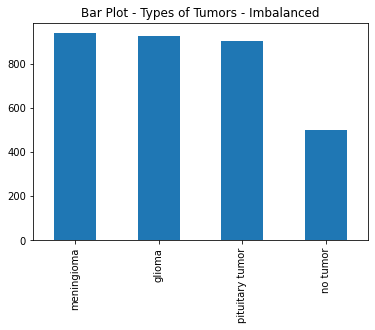

In [ ]:
brain_mri_df['Category'].value_counts().plot(kind='bar')
plt.title('Bar Plot - Types of Tumors - Imbalanced')
plt.show()

In [ ]:
# Balance dataframe

sample_size = 500

#source: https://stackoverflow.com/questions/41858827/selecting-n-elements-of-each-class
brain_mri_df = brain_mri_df.groupby('Category', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, sample_size, False),:])

In [ ]:
brain_mri_df['Category'].value_counts()

glioma             500
meningioma         500
no tumor           500
pituitary tumor    500
Name: Category, dtype: int64

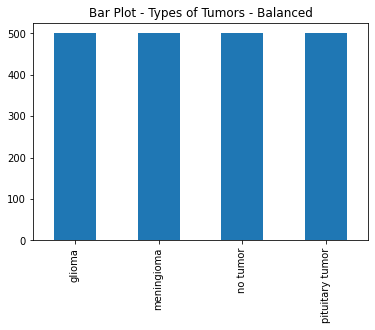

In [ ]:
brain_mri_df['Category'].value_counts().plot(kind='bar')
plt.title('Bar Plot - Types of Tumors - Balanced')
plt.show()

gg (677).jpg
Original Image


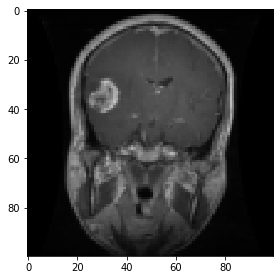

In [ ]:
# One Brain MRI scan Feature Extraction

image_list = brain_mri_df['Image_Name'].tolist()
image_name = image_list[0]
image = imread(mypath + '/' + image_name)
image = resize(image, (100,100))


#Showing original image
imshow(image)
print(image_name)
print('Original Image')

Red Band


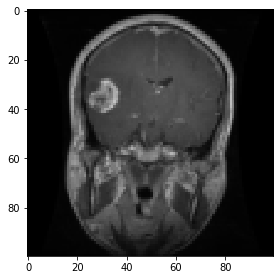

In [ ]:
# Viewing the red band
imshow(image[:,:,0])
print('Red Band')

Green Band


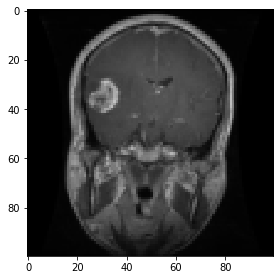

In [ ]:
# Viewing the green band
imshow(image[:,:,1])
print('Green Band')

Blue Band


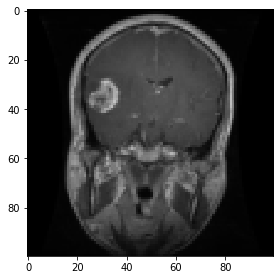

In [ ]:
# Viewing the blue band
imshow(image[:,:,2])
print('Blue Band')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


LBP


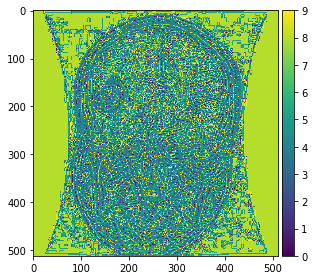

In [ ]:
# Showing LBP 
METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
radius = 1  # distance between central pixels and comparison pixels
n_points = 8 * radius  # define number of comparison pixels
gray_image = rgb2gray(image) 
lbp_image = local_binary_pattern(gray_image, n_points, radius, METHOD)
imshow(lbp_image)
print('LBP')

Horizontal Edges


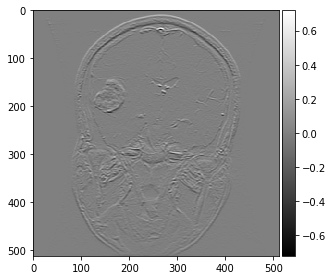

In [ ]:
# Showing Horizontal Edges
image = imread(mypath + '/' + image_name , as_gray=True)
edges_prewitt_horizontal = prewitt_h(image)
imshow(edges_prewitt_horizontal, cmap='gray')
print('Horizontal Edges')

Vertical Edges


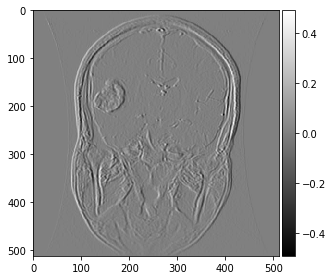

In [ ]:
# Showing Vertical Edges
edges_prewitt_vertical = prewitt_v(image)
imshow(edges_prewitt_vertical, cmap='gray')
print('Vertical Edges')

In [ ]:
# Feature Extraction Function 

def feature_extraction(i): 
  
  # Path of image
  image_path = mypath + '/' + i
 
  # Reading the image and resizing 
  image = imread(image_path)
  image = resize(image, (100,100))

  # RGB feature extraction
  rgb_feature_matrix = image[:,:,0] + image[:,:,1] + image[:,:,2] #finding the sum of the RGB values for all 3 RGB bands for each pixel
  rgb_feature_matrix = rgb_feature_matrix / 3 #finding the average RGB value for each pixel by dividing by 3
  rgb_features = np.reshape(rgb_feature_matrix, (100*100)) #flattening the features array into a single 1D vector

  # LBP feature extraction
  METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
  radius = 1  # distance between central pixels and comparison pixels
  n_points = 8 * radius  # define number of comparison pixels
  gray_image = rgb2gray(image) 
  lbp_image = local_binary_pattern(gray_image, n_points, radius, METHOD)
  lbp_features = np.reshape(lbp_image, (100*100))

  # Horizontal Edges
  horizontal_edges = prewitt_h(gray_image)
  horizontal_edges = np.reshape(horizontal_edges, (100*100)) 

  # Vertical Edges 
  vertical_edges = prewitt_v(gray_image)
  vertical_edges = np.reshape(vertical_edges, (100*100)) 

  # Concatenating all features 
  features = (np.concatenate((rgb_features, lbp_features, horizontal_edges, vertical_edges)))
  return features

In [ ]:
# Add Feature Extraction to DataFrame
image_list = brain_mri_df['Image_Name'].tolist()

#Initialize list
features_list = []

for image in image_list:
  features_list.append(feature_extraction(image))

# Add to dataframe
brain_mri_df['Features'] = features_list

In [ ]:
brain_mri_df.head()

Category    Image_Name  \
0 1250   glioma  gg (677).jpg   
  2162   glioma  gg (195).jpg   
  3177   glioma  gg (526).jpg   
  2194   glioma   gg (43).jpg   
  2487   glioma  gg (675).jpg   

                                                 Features  
0 1250  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
  2162  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
  3177  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
  2194  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
  2487  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [ ]:
# Binary Classifications:

# Glioma vs No Tumor
# Menigioma vs No Tumor
# Pituitary Tumor No Tumor
# Glioma vs Menigioma 
# Glioma vs Pituitary Tumor
# Menigioma vs Pituitary Tumor

# Create smaller dataframes for each binary classification
df1 = brain_mri_df.loc[(brain_mri_df['Category'] == 'glioma' ) | (brain_mri_df['Category'] == 'no tumor' )]
df2 = brain_mri_df.loc[(brain_mri_df['Category'] == 'meningioma' ) | (brain_mri_df['Category'] == 'no tumor' )]
df3 = brain_mri_df.loc[(brain_mri_df['Category'] == 'pituitary tumor' ) | (brain_mri_df['Category'] == 'no tumor' )]
df4 = brain_mri_df.loc[(brain_mri_df['Category'] == 'glioma' ) | (brain_mri_df['Category'] == 'meningioma' )]
df5 = brain_mri_df.loc[(brain_mri_df['Category'] == 'glioma' ) | (brain_mri_df['Category'] == 'pituitary tumor' )]
df6 = brain_mri_df.loc[(brain_mri_df['Category'] == 'meningioma' ) | (brain_mri_df['Category'] == 'pituitary tumor' )]

categories= {'Glioma vs No Tumor': df1,
             'Meningioma vs No Tumor': df2, 
             'Pituitary Tumor vs No Tumor': df3,
             'Glioma vs Meningioma': df4,
             'Glioma vs Pituitary Tumor': df5,
             'Meningioma vs Pituitary Tumor': df6,
            }

In [ ]:
# Double check counts in one dataframe
df1['Category'].value_counts()

glioma      500
no tumor    500
Name: Category, dtype: int64

In [ ]:
# Classifer Model Function

def build_model(model):
  
  # Fitting model to training dataset
  model.fit(X_train, y_train.ravel())
  
  # 5-Fold Cross Validation 
  from sklearn.model_selection import KFold 
  from sklearn.model_selection import cross_val_score
  
  k = 5
  kf = KFold(n_splits=k)

  result = cross_val_score(model, X_train, y_train, cv = kf, scoring='accuracy') 
  print(f'5-Fold CV Avg accuracy:{result.mean()}', end ='\n \n')

  cv_accuracy.append(result.mean())

  # Predicting test set results 
  y_pred = model.predict(X_test)

  # Classification Report 
  from sklearn.metrics import classification_report
  
  print(classification_report(y_test, y_pred))

  # Store accuracy, f1, precision, and recall in lists
  class_report = classification_report(y_test, y_pred, output_dict = True)
  accuracy_scores.append(class_report['accuracy'])
  f1_scores.append(class_report['weighted avg']['f1-score'])
  precision_scores.append(class_report['weighted avg']['precision'])
  recall_scores.append(class_report['weighted avg']['recall'])

In [ ]:
# Cross Validation Accuracy Graph Function
def accuracy_plot(cv_accuracies, accuracies):
  
  X_axis = np.arange(len(models))

  # Spacing between each bar
  spacing= 0.15

  # Setting the size of the graph
  plt.rcParams["figure.figsize"] = (20,3)
    
  # Plotting 2 bars for each model on the x-axis - Test Accuracy and CV Accuracy
  plt.bar(X_axis-spacing, cv_accuracies, 0.3, label = 'Cross Validation Accuracy')
  plt.bar(X_axis+spacing, accuracies, 0.3, label = 'Test Accuracy')

  # Setting the range of  X axis
  plt.xticks(X_axis, models)
  plt.xlabel("Model")
  plt.ylabel("Weighted Avg")
  plt.legend(loc='upper right')

In [ ]:
# Classfication Metrics Graph Function

def class_metrics(accuracies, precisions, recalls, f1s):
  
  X_axis = np.arange(len(models))

  #the spacing between each bar each bar
  spacing= 0.15

  #setting the size of the graph
  plt.rcParams["figure.figsize"] = (20,3)
    
  #below we are plotting 4 bars for each label on the x-axis with the following syntax
  #plt.bar(star_pos_for_each_bar, list_of_values, width_of each_bar, label_name_for each bar)
  plt.bar(X_axis - spacing, accuracy_scores, 0.25, label = 'Accuracy')
  plt.bar(X_axis, precision_scores, 0.25, label = 'Precision')
  plt.bar(X_axis + spacing, recall_scores, 0.25, label = 'Recall')
  plt.bar(X_axis + spacing * 2, f1_scores, 0.25, label = 'F1')

  #setting the range of values for the X axis
  plt.xticks(X_axis, models)
  plt.xlabel("Model")
  plt.ylabel("Weighted Avg")
  plt.legend(loc='upper right')

Glioma vs No Tumor


K-Nearest Neighbors: 
5-Fold CV Avg accuracy:0.7742857142857142
 
              precision    recall  f1-score   support

      glioma       0.71      0.94      0.81       144
    no tumor       0.92      0.65      0.76       156

    accuracy                           0.79       300
   macro avg       0.82      0.80      0.79       300
weighted avg       0.82      0.79      0.79       300



Gaussain Naive Bayes: 
5-Fold CV Avg accuracy:0.7942857142857144
 
              precision    recall  f1-score   support

      glioma       0.73      0.90      0.81       144
    no tumor       0.89      0.70      0.78       156

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300



Logistic Regression: 
5-Fold CV Avg accuracy:0.9185714285714285
 
              precision    recall  f1-score   support

      glioma       0.94      0.96      0.95       144
    no tumor 

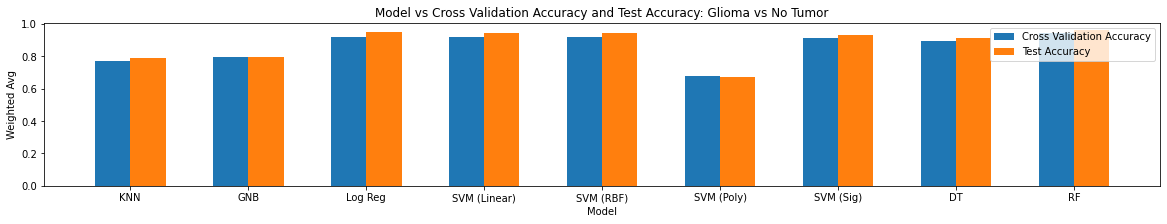

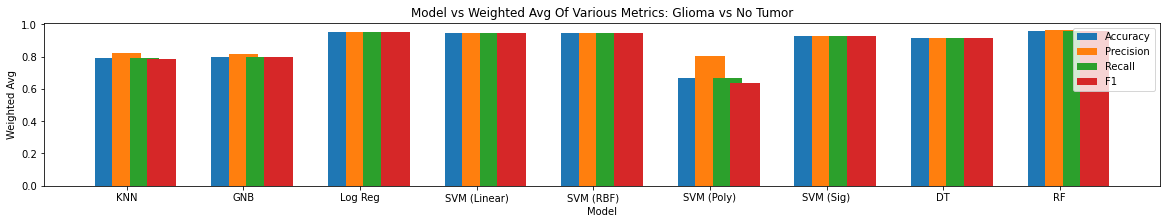



          Model  CV Accuracy  Accuracy  Precision    Recall  F1_score
8            RF     0.941429  0.960000   0.961234  0.960000  0.959929
2       Log Reg     0.918571  0.950000   0.950220  0.950000  0.950015
3  SVM (Linear)     0.917143  0.946667   0.947041  0.946667  0.946686
4     SVM (RBF)     0.918571  0.943333   0.943466  0.943333  0.943305
6     SVM (Sig)     0.911429  0.930000   0.930000  0.930000  0.929990
7            DT     0.897143  0.913333   0.914133  0.913333  0.913368
1           GNB     0.794286  0.796667   0.813355  0.796667  0.795093
0           KNN     0.774286  0.790000   0.820695  0.790000  0.786493
5    SVM (Poly)     0.680000  0.670000   0.804444  0.670000  0.635519


Meningioma vs No Tumor


K-Nearest Neighbors: 
5-Fold CV Avg accuracy:0.7757142857142857
 
              precision    recall  f1-score   support

  meningioma       0.81      0.76      0.78       144
    no tumor       0.79      0.83      0.81       156

    accuracy                           0.

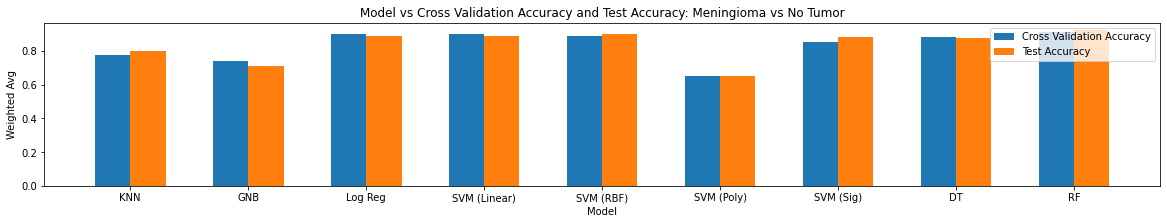

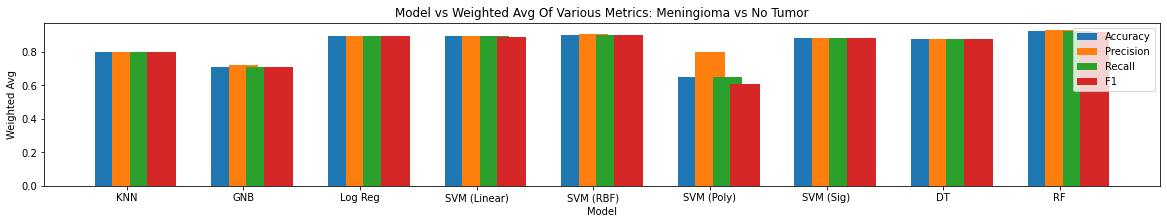



          Model  CV Accuracy  Accuracy  Precision    Recall  F1_score
8            RF     0.912857  0.920000   0.925813  0.920000  0.919515
4     SVM (RBF)     0.887143  0.900000   0.904215  0.900000  0.899498
2       Log Reg     0.898571  0.890000   0.889988  0.890000  0.889984
3  SVM (Linear)     0.901429  0.890000   0.890068  0.890000  0.889945
6     SVM (Sig)     0.851429  0.880000   0.882914  0.880000  0.879511
7            DT     0.881429  0.876667   0.877250  0.876667  0.876715
0           KNN     0.775714  0.796667   0.797253  0.796667  0.796238
1           GNB     0.741429  0.710000   0.720335  0.710000  0.708406
5    SVM (Poly)     0.652857  0.650000   0.797590  0.650000  0.607988


Pituitary Tumor vs No Tumor


K-Nearest Neighbors: 
5-Fold CV Avg accuracy:0.8785714285714287
 
                 precision    recall  f1-score   support

       no tumor       0.79      0.94      0.86       144
pituitary tumor       0.94      0.76      0.84       156

       accuracy            

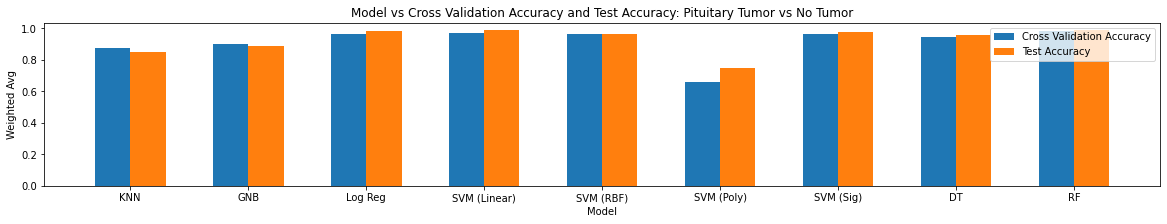

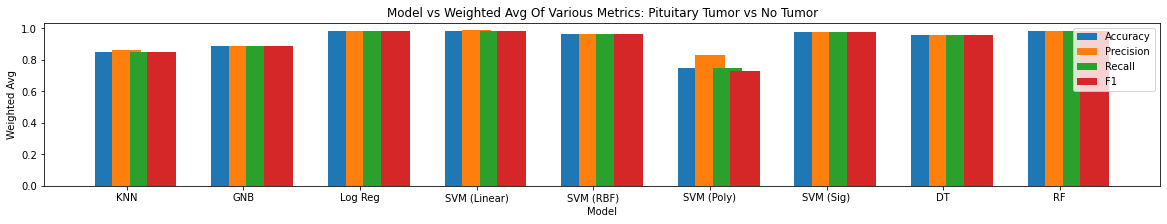



          Model  CV Accuracy  Accuracy  Precision    Recall  F1_score
3  SVM (Linear)     0.971429  0.986667   0.987000  0.986667  0.986657
8            RF     0.981429  0.986667   0.986760  0.986667  0.986670
2       Log Reg     0.967143  0.983333   0.983851  0.983333  0.983318
6     SVM (Sig)     0.965714  0.980000   0.980321  0.980000  0.979986
4     SVM (RBF)     0.962857  0.966667   0.966732  0.966667  0.966656
7            DT     0.947143  0.956667   0.957119  0.956667  0.956626
1           GNB     0.900000  0.890000   0.891152  0.890000  0.889768
0           KNN     0.878571  0.850000   0.864585  0.850000  0.849176
5    SVM (Poly)     0.660000  0.750000   0.831169  0.750000  0.730211


Glioma vs Meningioma


K-Nearest Neighbors: 
5-Fold CV Avg accuracy:0.6028571428571429
 
              precision    recall  f1-score   support

      glioma       0.54      0.93      0.68       144
  meningioma       0.80      0.26      0.40       156

    accuracy                           0.58

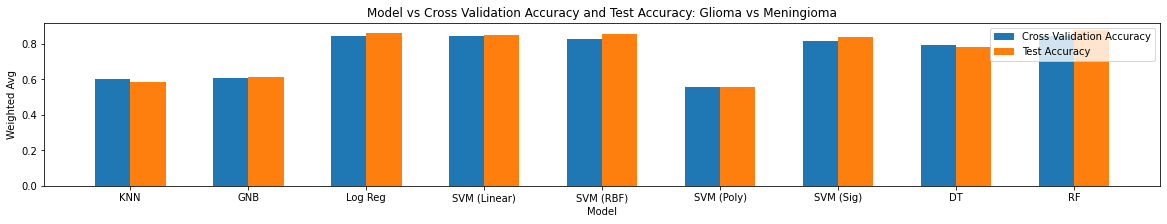

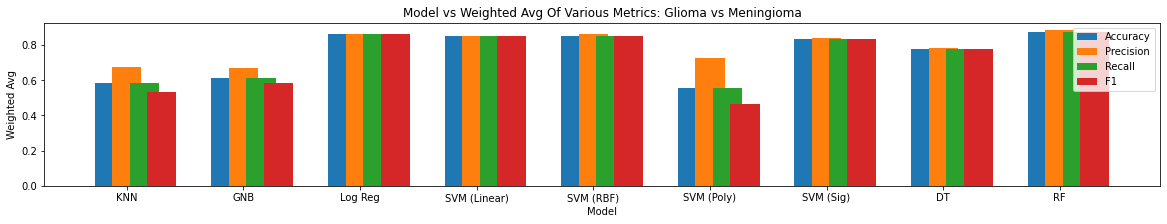



          Model  CV Accuracy  Accuracy  Precision    Recall  F1_score
8            RF     0.842857  0.873333   0.882444  0.873333  0.872100
2       Log Reg     0.844286  0.860000   0.860354  0.860000  0.859831
4     SVM (RBF)     0.822857  0.853333   0.860317  0.853333  0.852099
3  SVM (Linear)     0.840000  0.850000   0.850190  0.850000  0.849858
6     SVM (Sig)     0.811429  0.836667   0.838015  0.836667  0.836205
7            DT     0.792857  0.780000   0.783270  0.780000  0.779932
1           GNB     0.607143  0.610000   0.671114  0.610000  0.581419
0           KNN     0.602857  0.583333   0.676352  0.583333  0.533319
5    SVM (Poly)     0.557143  0.553333   0.728759  0.553333  0.463267


Glioma vs Pituitary Tumor


K-Nearest Neighbors: 
5-Fold CV Avg accuracy:0.7914285714285714
 
                 precision    recall  f1-score   support

         glioma       0.73      0.99      0.84       144
pituitary tumor       0.98      0.66      0.79       156

       accuracy              

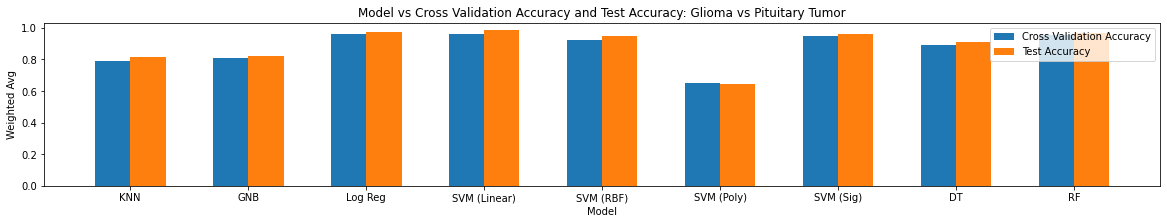

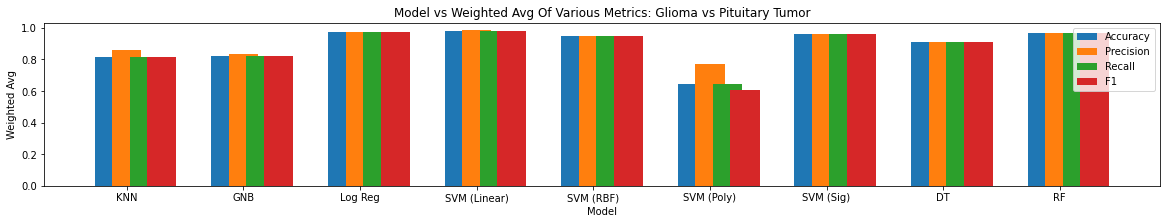



          Model  CV Accuracy  Accuracy  Precision    Recall  F1_score
3  SVM (Linear)     0.961429  0.983333   0.983514  0.983333  0.983325
2       Log Reg     0.962857  0.976667   0.976682  0.976667  0.976663
8            RF     0.955714  0.966667   0.966732  0.966667  0.966656
6     SVM (Sig)     0.947143  0.960000   0.960000  0.960000  0.960000
4     SVM (RBF)     0.922857  0.950000   0.950893  0.950000  0.949926
7            DT     0.894286  0.910000   0.910092  0.910000  0.909955
1           GNB     0.808571  0.823333   0.832132  0.823333  0.822836
0           KNN     0.791429  0.816667   0.859634  0.816667  0.812545
5    SVM (Poly)     0.650000  0.646667   0.769520  0.646667  0.608866


Meningioma vs Pituitary Tumor


K-Nearest Neighbors: 
5-Fold CV Avg accuracy:0.8628571428571428
 
                 precision    recall  f1-score   support

     meningioma       0.82      0.88      0.85       144
pituitary tumor       0.88      0.83      0.85       156

       accuracy          

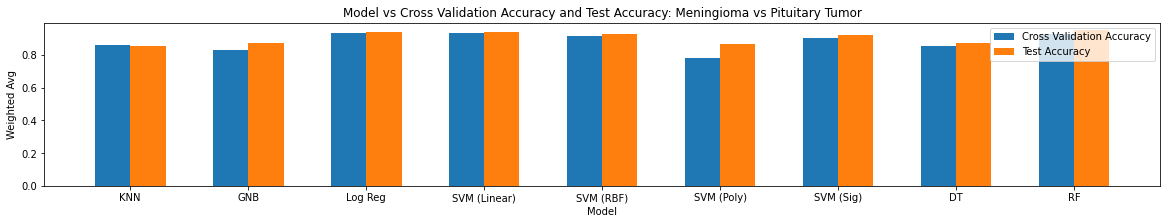

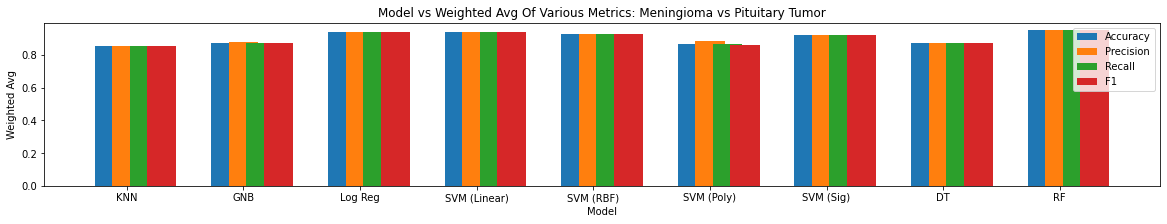



          Model  CV Accuracy  Accuracy  Precision    Recall  F1_score
8            RF     0.927143  0.950000   0.950033  0.950000  0.950006
2       Log Reg     0.932857  0.940000   0.940250  0.940000  0.939957
3  SVM (Linear)     0.935714  0.940000   0.940250  0.940000  0.939957
4     SVM (RBF)     0.917143  0.930000   0.930116  0.930000  0.929965
6     SVM (Sig)     0.905714  0.920000   0.920214  0.920000  0.919943
1           GNB     0.828571  0.873333   0.877069  0.873333  0.873294
7            DT     0.857143  0.873333   0.874133  0.873333  0.873384
5    SVM (Poly)     0.780000  0.866667   0.888194  0.866667  0.864039
0           KNN     0.862857  0.853333   0.855296  0.853333  0.853366




In [ ]:
# Supervised Machine Learning 
# KNN, GNB, LogReg, SVM, DT, RF  

for comparison in categories:
  print(comparison)
  print('\n')

  df = categories[comparison]
  image_list = df['Image_Name'].tolist()
  features_list = df['Features'].tolist()

  # Convert feature extraction to np array
  all_features = np.array(features_list)
  
  # Splitting dataset into features and targets 
  X = all_features
  y = df['Category'].values

  # Splitting data into training and tests
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

  # Feature Processing - Standardization
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Initialize lists for Classification Metrics Graph
  models = ['KNN', 'GNB', 'Log Reg', 'SVM (Linear)', 'SVM (RBF)', 'SVM (Poly)', 'SVM (Sig)', 'DT', 'RF']
  cv_accuracy = []
  accuracy_scores = []
  f1_scores = []
  precision_scores = []
  recall_scores = []

  # Creating models

  # KNN model
  knn = KNeighborsClassifier(n_neighbors=10)
  print('K-Nearest Neighbors: ', end = '\n')
  build_model(knn)
  print('\n')

  # NB model
  gnb = GaussianNB()
  print('Gaussain Naive Bayes: ', end = '\n')
  build_model(gnb)
  print('\n')

  # LogReg model
  logReg = LogisticRegression()
  print('Logistic Regression: ', end = '\n')
  build_model(logReg)
  print('\n')

  # SVM models

  # Linear SVM
  linear_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
  print('Linear Support Vector Machines: ', end = '\n')
  build_model(linear_svm)
  print('\n')

  # RBF SVM
  rbf_svm = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo')
  print('RBF Support Vector Machines: ', end = '\n')
  build_model(rbf_svm)
  print('\n')

  # Poly SVM
  poly_svm = svm.SVC(kernel='poly', C=1, decision_function_shape='ovo')
  print('Polynomial Support Vector Machines: ', end = '\n')
  build_model(poly_svm)
  print('\n')

  # Sig SVM
  sig_svm = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
  print('Sigmoid Support Vector Machines: ', end = '\n')
  build_model(sig_svm)
  print('\n')

  # DT model  
  dt = DecisionTreeClassifier()
  print('Decision Tree: ', end = '\n')
  build_model(dt)
  print('\n')
  
  # RF model
  rf = RandomForestClassifier(n_estimators=100)
  print('Random Forest: ', end = '\n')
  build_model(rf)
  print('\n')
  
  # Generate Cross Validation Accuracy Graph 
  accuracy_plot(cv_accuracy, accuracy_scores)
  plt.title("Model vs Cross Validation Accuracy and Test Accuracy: " + comparison)
  plt.show()
  print('\n')

  # Generate Classification Metrics
  class_metrics(accuracy_scores, precision_scores, recall_scores, f1_scores)
  plt.title("Model vs Weighted Avg Of Various Metrics: " + comparison)
  plt.show()
  print('\n')

  # Supervised Learning Classification Metrics DataFrame

  scores_dict = {'Model': models,
                'CV Accuracy': cv_accuracy,
                'Accuracy': accuracy_scores,
                'Precision': precision_scores,
                'Recall': recall_scores,
                'F1_score': f1_scores}

  scores_df = pd.DataFrame(scores_dict).sort_values(by=['Accuracy'], ascending=False)
  print(scores_df)
  print('\n')

